# PML-CAP10-Revisiting statistics

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("csv/FuelConsumptionCo2.csv")
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


mean ENGINESIZE        3.322145
CO2EMISSIONS    254.751748
dtype: float64


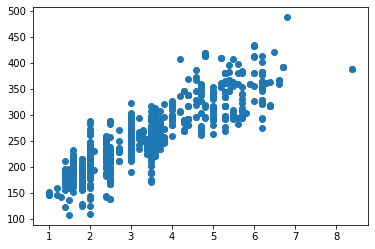

mean 3.322144522144522
mean 3.322144522144522


In [23]:
cdf=df[['ENGINESIZE','CO2EMISSIONS','CYLINDERS']]
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]
print('mean',np.mean(train))
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.show()


### Mean Median Mode

In [43]:
from scipy import stats
pobl_x=cdf['ENGINESIZE']
train_x=train['ENGINESIZE']
print('mean ',np.mean(train_x))
print('mean',np.sum(train_x)/len(train_x))
print('median',np.median(train_x))
print('mode',stats.mode(train_x))

mean  3.3221445221445163
mean 3.322144522144522
median 3.4
mode ModeResult(mode=array([2.]), count=array([121]))


### Variance

In [57]:
import math
N=len(train_x)
print('N',N)
#Desviacion tipica sig=sqrt(1/N*SUM(x-med(x))^2)
print('sig',math.sqrt(1*np.sum(pow(train_x-np.mean(train_x),2))/len(pobl_x)))
#Desviacion Standar  sig=sqrt(1/(N-1)*SUM(x-med(x))^2)
std=math.sqrt(1*np.sum(pow(train_x-np.mean(train_x),2))/(N-1))
print('std',std)
V=pow(std,2)
train_x.describe()

N 858
sig 1.2505441192791213
std 1.3953746121181294


count    858.000000
mean       3.322145
std        1.395375
min        1.000000
25%        2.000000
50%        3.400000
75%        4.000000
max        8.400000
Name: ENGINESIZE, dtype: float64

### Symmetric

In [49]:
rtol=1e-05
atol=1e-08
sym=np.allclose(train_x, train_x.T, rtol=rtol, atol=atol)
print('Sym',sym)

Sym True


### Covariance and Correlation Coeficient

In [73]:
train_x=train['ENGINESIZE']
train_y=train['CO2EMISSIONS']
Pxy=np.sum((train_x-np.mean(train_x))*(train_y-np.mean(train_y)))/len(train_x)
print('Cov Pxy',Pxy)
stats_x=train_x.describe()
stats_y=train_y.describe()
print('STD X',stats_x['std'])
print('STD Y',stats_y['std'])
Cxy=Pxy/(stats_x['std']*stats_y['std'])
print('Cov Pxy',Cxy)

Cov Pxy 76.45561396645313
STD X 1.3953746121181336
STD Y 62.74013492331354
Cov Pxy 0.8733194143456533


### Covariance issue